In [1]:
gse_id='GSE56606'
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/{gse_id}/suppl/{gse_id}_raw_data.txt.gz -O matrix.gz

--2020-06-10 03:40:53--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56606/suppl/GSE56606_raw_data.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 2607:f220:41e:250::11
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27363756 (26M) [application/x-gzip]
Saving to: ‘matrix.gz’

matrix.gz           100%[===================>]  26.10M  57.1MB/s    in 0.5s    

2020-06-10 03:40:53 (57.1 MB/s) - ‘matrix.gz’ saved [27363756/27363756]



In [2]:
import pandas as pd
df=pd.read_table('matrix.gz',index_col=0)
df.shape

(27578, 300)

In [3]:
cols=[c for c in df.columns if 'Beta' in c]
df=df[cols].transpose()
df.index=[c.split(':')[0] for c in df.index]
df.index.name = "title"
df.head()

ProbeID,cg22461835,cg04171565,cg16257091,cg05751979,cg12645742,cg12271587,cg06240849,cg18220560,cg06714705,cg00579402,...,cg10722799,cg07314984,cg13263114,cg24930915,cg04968426,cg00239419,cg19528976,cg17412560,cg11353032,cg18138552
title,,,,,,,,,,,,,,,,,,,,,
55_CD4_Normalpair9_normal_MZ,0.11980,0.00160,0.02920,0.00000,0.03260,0.78440,0.02730,0.12580,0.83610,0.68550,...,0.03730,0.30970,0.00010,0.02920,0.92350,0.71740,0.06400,0.30370,0.03720,0.08850
38_CD4_T1Dpair17_T1D,0.10411,0.02839,0.02720,0.04650,0.03609,0.84847,0.02908,0.11942,0.92397,0.72388,...,0.03754,0.17116,0.05469,0.05062,0.92267,0.85637,0.07425,0.59097,0.04139,0.05350
42_CD4_Normalpair2_normal_MZ,0.10586,0.05922,0.05269,0.05006,0.02632,0.73742,0.03654,0.11151,0.88771,0.68190,...,0.03370,0.20838,0.09355,0.03175,0.92911,0.75632,0.05197,0.34991,0.01725,0.07042
17_CD4_T1Dpair5_unaffected,0.16384,0.08417,0.04615,0.06623,0.02615,0.54670,0.02205,0.13720,0.71465,0.76567,...,0.02756,0.16168,0.08480,0.03115,0.86194,0.50668,0.06236,0.23497,0.02617,0.08357
71_CD14_T1Dpair8_unaffected,0.13170,0.02020,0.01360,0.00710,0.03850,0.83840,0.03130,0.09310,0.92750,0.70660,...,0.02270,0.13600,0.02400,0.03300,0.90970,0.84730,0.08890,0.64830,0.02310,0.03260


In [4]:
import GEOparse
gse = GEOparse.get_GEO(geo=gse_id, destdir="./")
ages=gse.phenotype_data[['title','characteristics_ch1.2.age (yrs)']]
ages.index=ages.title
ages=ages.drop('title',1)
ages.columns=['age']

10-Jun-2020 03:40:56 DEBUG utils - Directory ./ already exists. Skipping.
10-Jun-2020 03:40:56 INFO GEOparse - File already exist: using local version.
10-Jun-2020 03:40:56 INFO GEOparse - Parsing ./GSE56606_family.soft.gz: 
10-Jun-2020 03:40:56 DEBUG GEOparse - DATABASE: GeoMiame
10-Jun-2020 03:40:56 DEBUG GEOparse - SERIES: GSE56606
10-Jun-2020 03:40:56 DEBUG GEOparse - PLATFORM: GPL8490
10-Jun-2020 03:40:57 DEBUG GEOparse - SAMPLE: GSM1365585
10-Jun-2020 03:40:57 DEBUG GEOparse - SAMPLE: GSM1365586
10-Jun-2020 03:40:57 DEBUG GEOparse - SAMPLE: GSM1365587
10-Jun-2020 03:40:57 DEBUG GEOparse - SAMPLE: GSM1365588
10-Jun-2020 03:40:57 DEBUG GEOparse - SAMPLE: GSM1365589
10-Jun-2020 03:40:57 DEBUG GEOparse - SAMPLE: GSM1365590
10-Jun-2020 03:40:57 DEBUG GEOparse - SAMPLE: GSM1365591
10-Jun-2020 03:40:57 DEBUG GEOparse - SAMPLE: GSM1365592
10-Jun-2020 03:40:57 DEBUG GEOparse - SAMPLE: GSM1365593
10-Jun-2020 03:40:57 DEBUG GEOparse - SAMPLE: GSM1365594
10-Jun-2020 03:40:57 DEBUG GEOparse -

In [5]:
df=df.merge(ages,left_index=True, right_index=True)
df.head()

,cg22461835,cg04171565,cg16257091,cg05751979,cg12645742,cg12271587,cg06240849,cg18220560,cg06714705,cg00579402,...,cg07314984,cg13263114,cg24930915,cg04968426,cg00239419,cg19528976,cg17412560,cg11353032,cg18138552,age
title,,,,,,,,,,,,,,,,,,,,,
55_CD4_Normalpair9_normal_MZ,0.11980,0.00160,0.02920,0.00000,0.03260,0.78440,0.02730,0.12580,0.83610,0.68550,...,0.30970,0.00010,0.02920,0.92350,0.71740,0.06400,0.30370,0.03720,0.08850,18
38_CD4_T1Dpair17_T1D,0.10411,0.02839,0.02720,0.04650,0.03609,0.84847,0.02908,0.11942,0.92397,0.72388,...,0.17116,0.05469,0.05062,0.92267,0.85637,0.07425,0.59097,0.04139,0.05350,42
42_CD4_Normalpair2_normal_MZ,0.10586,0.05922,0.05269,0.05006,0.02632,0.73742,0.03654,0.11151,0.88771,0.68190,...,0.20838,0.09355,0.03175,0.92911,0.75632,0.05197,0.34991,0.01725,0.07042,52
17_CD4_T1Dpair5_unaffected,0.16384,0.08417,0.04615,0.06623,0.02615,0.54670,0.02205,0.13720,0.71465,0.76567,...,0.16168,0.08480,0.03115,0.86194,0.50668,0.06236,0.23497,0.02617,0.08357,-
71_CD14_T1Dpair8_unaffected,0.13170,0.02020,0.01360,0.00710,0.03850,0.83840,0.03130,0.09310,0.92750,0.70660,...,0.13600,0.02400,0.03300,0.90970,0.84730,0.08890,0.64830,0.02310,0.03260,20


In [48]:
import numpy as np
df.age=df.age.replace('-',np.nan)
df=df.dropna(subset=['age'])
df.age=df.age.astype(int)
df.shape

(90, 27579)

In [70]:
cor=df.corrwith(df.age)
cor.sort_values()

cg01200177   -0.668715
cg23124451   -0.593070
cg27015931   -0.549218
cg26614073   -0.545255
cg01820374   -0.542061
                ...   
cg09527362    0.482557
cg02564523    0.484145
cg19149785    0.489045
cg02654291    0.489590
age           1.000000
Length: 27579, dtype: float64

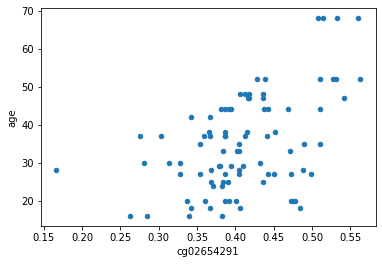

In [85]:
df.plot.scatter('cg02654291','age')

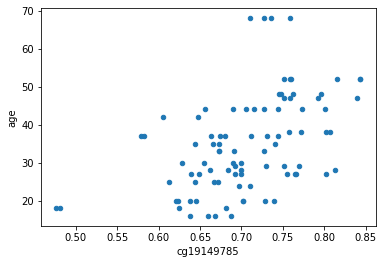

In [86]:
df.plot.scatter('cg19149785','age')

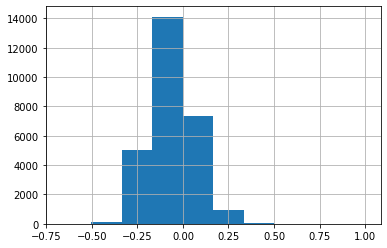

In [68]:
import matplotlib as plt
cor.hist()